### Choose from configuration files

In [14]:
# "2dLink", "2dFall", "2dSwim", "2dThrow", "2dTplate", "2dFallingCircle"
# "3dHinge", "3dPrismatic", "3dCylindrical"

casename = "2dSwim";

### Include Dyn3d and config files

In [15]:
using Pkg
Pkg.activate("..")

using Revise
using Dyn3d
using Interact, Reactive
using Plots
pyplot()

Plots.PyPlotBackend()

In [16]:
include("../src/config_files/"*casename*".jl");

Config info set up.


### Build joint-body chain

In [17]:
bodys, joints, system = BuildChain(config_bodys, config_joints,
                                   config_system)
bd = BodyDyn(bodys, joints, system)

This is a 6 body-joint system, system is un-mounted from space

### Initialize system state

In [18]:
# init system
bd, soln = InitSystem!(bd)

# init soln structure
solns = (Soln)[]
push!(solns, soln)

# init VertsHistory struct
vs = []
push!(vs, VertsHistory(system.nbody, bd.bs));

### Set up HERKBody object

In [19]:
herk = HERKBody(system.num_params,HERKFuncM, HERKFuncGT, HERKFuncG,
                (HERKFuncf,HERKFuncgti), (UpdatePosition!,UpdateVelocity!))

Order-5 HERK time-marching function like object for Dyn3d


### Time Marching

#### Note that sometimes the solver can break due to singular matrix. Change between fixed step or not to solve the problem

In [20]:
bdhist = []

0-element Array{Any,1}

In [21]:
idx = 0
@time begin
while soln.t < tf
    # advance one step
    global soln, bd = herk(soln, bd)
#     soln, bd = herk(soln, bd, _isfixedstep=true)

    # record soln and verts_i info
    push!(solns, soln)
    push!(vs, VertsHistory(system.nbody, bd.bs))
    push!(bdhist,deepcopy(bd))
        
    # print progress
    global idx += 1
    if mod(idx,500) == 1
        println("itr = $(idx), t = $(round(soln.t,digits=2)), dt = $(round(soln.dt,digits=4))")
#         println("center of mass at", MassCenter(bodys, system))
    end
end
println("itr = $(idx), t = $(round(soln.t,digits=2)), dt = $(round(soln.dt,digits=4)) \n")
end

itr = 1, t = 0.0, dt = 0.0001
itr = 501, t = 2.72, dt = 0.0052
itr = 739, t = 4.0, dt = 0.0059 

  4.229750 seconds (3.87 M allocations: 1.037 GiB, 12.02% gc time)


In [22]:
for i = 1:length(solns)-1
    @getfield bdhist[i] (bs,sys)
    println(MassCenter(bs,sys))
end

[0.180461, 0.343823, 1.0]
[0.18047, 0.343809, 1.0]
[0.180998, 0.343006, 1.0]
[0.181503, 0.342253, 1.0]
[0.181985, 0.34155, 1.0]
[0.182443, 0.3409, 1.0]
[0.182877, 0.340306, 1.0]
[0.183284, 0.339771, 1.0]
[0.183666, 0.339296, 1.0]
[0.18402, 0.338884, 1.0]
[0.184347, 0.338535, 1.0]
[0.184646, 0.338251, 1.0]
[0.184917, 0.338033, 1.0]
[0.18516, 0.33788, 1.0]
[0.185374, 0.337793, 1.0]
[0.185559, 0.337772, 1.0]
[0.185716, 0.337816, 1.0]
[0.185846, 0.337923, 1.0]
[0.185948, 0.338092, 1.0]
[0.186023, 0.338321, 1.0]
[0.186073, 0.338608, 1.0]
[0.186098, 0.338952, 1.0]
[0.186099, 0.339351, 1.0]
[0.186077, 0.339803, 1.0]
[0.186033, 0.340308, 1.0]
[0.185968, 0.340864, 1.0]
[0.185882, 0.34147, 1.0]
[0.185777, 0.342127, 1.0]
[0.185652, 0.342832, 1.0]
[0.185509, 0.343586, 1.0]
[0.185349, 0.344387, 1.0]
[0.185172, 0.345232, 1.0]
[0.18498, 0.346118, 1.0]
[0.184775, 0.34704, 1.0]
[0.18456, 0.347989, 1.0]
[0.184336, 0.348958, 1.0]
[0.184108, 0.349935, 1.0]
[0.183877, 0.350912, 1.0]
[0.183646, 0.351881, 1.

[0.216719, 0.350313, 1.0]
[0.216576, 0.35115, 1.0]
[0.216419, 0.35203, 1.0]
[0.216249, 0.352949, 1.0]
[0.216069, 0.353899, 1.0]
[0.215881, 0.354871, 1.0]
[0.215687, 0.355856, 1.0]
[0.215489, 0.356845, 1.0]
[0.215291, 0.357828, 1.0]
[0.215094, 0.358799, 1.0]
[0.214898, 0.359754, 1.0]
[0.214706, 0.36069, 1.0]
[0.214517, 0.361604, 1.0]
[0.214331, 0.362496, 1.0]
[0.214149, 0.363363, 1.0]
[0.213971, 0.364206, 1.0]
[0.213797, 0.365023, 1.0]
[0.213627, 0.365813, 1.0]
[0.213461, 0.366576, 1.0]
[0.213298, 0.367311, 1.0]
[0.213138, 0.368015, 1.0]
[0.212982, 0.368689, 1.0]
[0.212828, 0.36933, 1.0]
[0.212677, 0.369936, 1.0]
[0.212527, 0.370505, 1.0]
[0.21238, 0.371034, 1.0]
[0.212234, 0.37152, 1.0]
[0.212089, 0.371958, 1.0]
[0.211943, 0.372343, 1.0]
[0.211797, 0.372668, 1.0]
[0.21165, 0.372924, 1.0]
[0.211501, 0.3731, 1.0]
[0.211351, 0.373182, 1.0]
[0.211203, 0.37316, 1.0]
[0.211059, 0.373034, 1.0]
[0.210922, 0.372815, 1.0]
[0.210794, 0.372514, 1.0]
[0.210672, 0.372146, 1.0]
[0.210555, 0.371718, 1

### Generate verts data on regulated time grid

In [8]:
bodys, joints, system = bd.bs, bd.js, bd.sys

using Interpolations

# create regular time grid and acquire solutions on it
qJ_regs = Float64[]
t_reg = range(0,stop=solns[end].t,length=length(solns))
for i = 1:system.ndof
    t_temp = ([solns[k].t for k = 1:length(solns)],)
    qJ_temp = [solns[k].qJ[i] for k = 1:length(solns)]   
    qJ_reg = interpolate(t_temp, qJ_temp, Gridded(Linear()))(t_reg)
    append!(qJ_regs, qJ_reg)
end
qJ_regs = reshape(qJ_regs,(length(solns), system.ndof))

# get verts info based on this regular grid solution
vs_reg = []
bodys_reg = deepcopy(bodys)
joints_reg = deepcopy(joints)
system_reg = deepcopy(system)
for i = 1:length(solns)
    bodys_reg, joints_reg, system_reg = UpdatePosition!(bodys_reg, joints_reg, system_reg, solns[i].qJ)
    push!(vs_reg, VertsHistory(system.nbody, bodys_reg))
end

#### Store time-regulated verts in tuples

In [9]:
# plot direction
v = @isdefined(plot_dir) ? plot_dir : system.ndim==2 ? (1,2) : (1,2,3)

if system.ndim == 2
    # push the verts of all body in the same time into a tuple
    vs_total = []
    for i = 1:length(t_reg)
        vs_tmp = []
        for k = 1:system.nbody
            push!(vs_tmp,[vs_reg[i][k,:,v[1]],vs_reg[i][k,:,v[2]]])
        end
        push!(vs_total,vs_tmp)
    end
elseif system.ndim == 3
    h = [1:bodys[1].nverts;1]
    # push the verts of all body in the same time into a tuple
    vs_total = []
    for i = 1:length(t_reg)
        vs_tmp = []
        for k = 1:system.nbody
            push!(vs_tmp,[vs_reg[i][k,h,v[1]],vs_reg[i][k,h,v[2]],vs_reg[i][k,h,v[3]]])
        end
        push!(vs_total,vs_tmp)
    end       
end

### Interactive plot

In [10]:
# total number of frames for this interactive plot
plot_number = 50;

In [11]:
freq = round(Int,idx/plot_number)
camera_view = (45,45)

if system.ndim == 2
    @manipulate for i = 1:freq:length(t_reg)
        p = plot()        
        for j in 1:system.nbody
            plot!(vs_total[i][j][1],vs_total[i][j][2], linewidth=3)            
        end    
        plot!(xlims=(-2,2), ylims=(-2,2), aspect_ratio=:equal)        
    end
elseif system.ndim == 3
    @manipulate for i = 1:freq:length(t_reg)
        h = [1:bodys[1].nverts;1]
        p = plot()
        for j in 2:system.nbody
            plot!(vs_total[i][j][1],vs_total[i][j][2],vs_total[i][j][3], linewidth=3)
        end    
        plot!(xlims=(-2,2), ylims=(-2,2), zlims=(-2,2), aspect_ratio=:equal, camera = camera_view)     
    end
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope("knockout-component-ff3693ba-9fc0-4b25-a05d-8b868f3d543e", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row-left"), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>736,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>15,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-center"), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-right"), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget"), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Int64} with 2 listeners. Value:
361, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/fs/.julia/packages/Knockout/JE2Yq/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/fs/.julia/packages/Knockout/JE2Yq/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/fs/.julia/packages/InteractBase/R8JgH/src/../assets/all.js"), Asset("css", nothing, "/home/fs/.julia/packages/InteractBase/R8JgH/src/../assets/style.css"), Asset("css", nothing, "/home/fs/.julia/packages/Interact/0klKX/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"16\",\"31\",\"46\",\"61\",\"76\",\"91\",\"106\",\"121\",\"136\",\"151\",\"166\",\"181\",\"196\",\"211\",\"226\",\"241\",\"256\",\"271\",\"286\",\"301\",\"316\",\"331\",\"346\",\"361\",\"376\",\"391\",\"406\",\"421\",\"436\",\"451\",\"466\",\"481\",\"496\",\"511\",\"526\",\"541\",\"556\",\"571\",\"586\",\"601\",\"616\",\"631\",\"646\",\"661\",\"676\",\"691\",\"706\",\"721\",\"736\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"knockout-component-ff3693ba-9fc0-4b25-a05d-8b868f3d543e\",\"id\":\"ob_02\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\

### Make gif

In [12]:
# Total number of seconds of this gif
gif_time = 8;

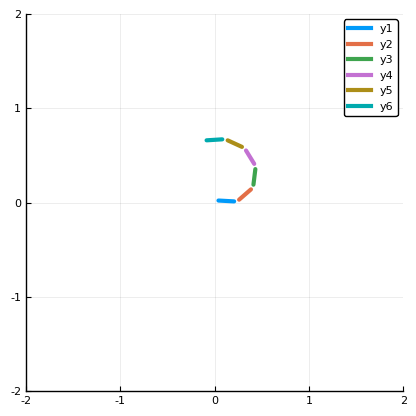

┌ Info: Saved animation to 
│   fn = /mnt/g/Research/Dyn3d.jl/notebook/2dSwim.gif
└ @ Plots /home/fs/.julia/packages/Plots/oiirH/src/animation.jl:90


Plots.AnimatedGif("/mnt/g/Research/Dyn3d.jl/notebook/2dSwim.gif")

In [13]:
freq = round(Int,idx/30/gif_time)
camera_view = (45,45)

if system.ndim == 2
    anim = @animate for i = 1:freq:length(t_reg)
        p = plot()        
        for j in 1:system.nbody
            plot!(vs_total[i][j][1],vs_total[i][j][2], linewidth=3)            
        end    
        plot!(xlims=(-2,2), ylims=(-2,2), aspect_ratio=:equal)        
    end        
elseif system.ndim == 3 
    anim = @animate for i = 1:freq:length(t_reg)
        h = [1:bodys[1].nverts;1]
        p = plot()
        for j in 2:system.nbody
            plot!(vs_total[i][j][1],vs_total[i][j][2],vs_total[i][j][3], linewidth=3)
        end    
        plot!(xlims=(-2,2), ylims=(-2,2), zlims=(-2,2), aspect_ratio=:equal, camera = camera_view)
    end    
end
nothing
gif(anim, casename*".gif", fps = 30)